## CMP 414 Mid-Term Project: RMS Titanic

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although where was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.


![titanic](Img/titanic.jpg)

#  Stage I: Data Exploration

In [3]:
# Data Analysis 
import pandas as pd
import numpy as np
import missingno as msno
# pip install missingno

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the two datasets as pandas DataFrames.
train_df = pd.read_csv("Data/titanic/train.csv", delimiter=",")
test_df = pd.read_csv("Data/titanic/test.csv", delimiter=",")

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# Size of train and test
print("Train:", train_df.shape)
print("Test:", test_df.shape)

Train: (891, 12)
Test: (418, 11)


In [8]:
display('train_df', 'test_df')

'train_df'

'test_df'

In [9]:
# Combine datasets train & test into a single DataFrame
data = pd.concat([train_df, test_df], ignore_index=True)
data.head(20)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [10]:
# Reorder column names
column_names = ["Name", "Age", "Sex", "Ticket", "Fare", "Pclass", "Embarked", "Cabin", "SibSp", "Parch", "Survived", "PassengerId"]
data = data.reindex(columns=column_names)
data.head(20)

,Name,Age,Sex,Ticket,Fare,Pclass,Embarked,Cabin,SibSp,Parch,Survived,PassengerId
0,"Braund, Mr. Owen Harris",22.0,male,A/5 21171,7.2500,3,S,NaN,1,0,0.0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,PC 17599,71.2833,1,C,C85,1,0,1.0,2
2,"Heikkinen, Miss. Laina",26.0,female,STON/O2. 3101282,7.9250,3,S,NaN,0,0,1.0,3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,113803,53.1000,1,S,C123,1,0,1.0,4
4,"Allen, Mr. William Henry",35.0,male,373450,8.0500,3,S,NaN,0,0,0.0,5
5,"Moran, Mr. James",NaN,male,330877,8.4583,3,Q,NaN,0,0,0.0,6
6,"McCarthy, Mr. Timothy J",54.0,male,17463,51.8625,1,S,E46,0,0,0.0,7
7,"Palsson, Master. Gosta Leonard",2.0,male,349909,21.0750,3,S,NaN,3,1,0.0,8
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,female,347742,11.1333,3,S,NaN,0,2,1.0,9
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,female,237736,30.0708,2,C,NaN,1,0,1.0,10


## Information of Variables

In [11]:
# Size, column names, and data types
print(data.shape)
print(data.dtypes)

(1309, 12)
Name            object
Age            float64
Sex             object
Ticket          object
Fare           float64
Pclass           int64
Embarked        object
Cabin           object
SibSp            int64
Parch            int64
Survived       float64
PassengerId      int64
dtype: object


In [12]:
# Distribution of Numerical Values

# data.describe()

numeric_cols = ['Age', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'SibSp', 'Survived']
data[numeric_cols].describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c40cf28>,
      dtype=object)

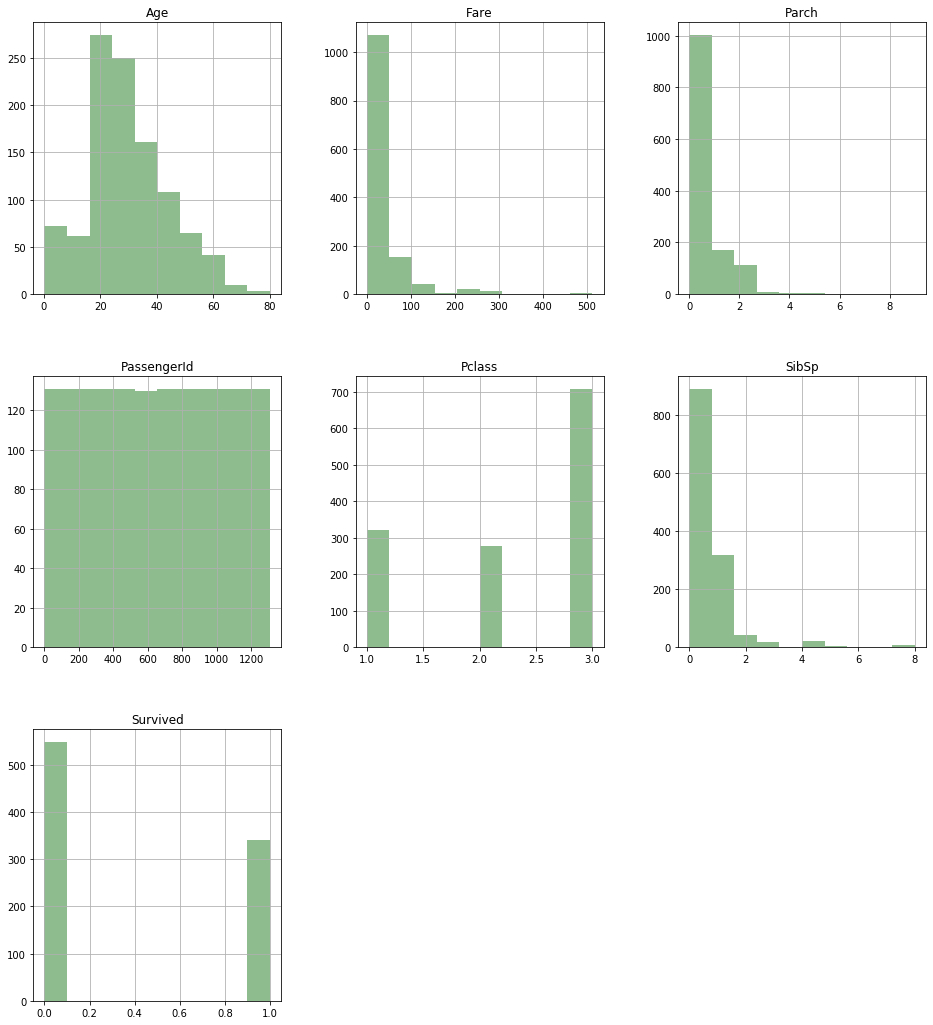

In [13]:
# Plot the distributions as histograms
data[numeric_cols].hist(color = "darkseagreen", figsize = (16,18))

**Maximum, Minimum, Mean and Standard Deviation of numerical features**

In [14]:
# Max
print(data[numeric_cols].max())

Age              80.0000
Fare            512.3292
Parch             9.0000
PassengerId    1309.0000
Pclass            3.0000
SibSp             8.0000
Survived          1.0000
dtype: float64


In [15]:
# Min
print(data[numeric_cols].min())

Age            0.17
Fare           0.00
Parch          0.00
PassengerId    1.00
Pclass         1.00
SibSp          0.00
Survived       0.00
dtype: float64


In [16]:
# Mean
print(data[numeric_cols].mean())

Age             29.881138
Fare            33.295479
Parch            0.385027
PassengerId    655.000000
Pclass           2.294882
SibSp            0.498854
Survived         0.383838
dtype: float64


In [17]:
# Standard Deviation
print(data[numeric_cols].std())

Age             14.413493
Fare            51.758668
Parch            0.865560
PassengerId    378.020061
Pclass           0.837836
SibSp            1.041658
Survived         0.486592
dtype: float64


## Prediction Power
- Visualization and Feature Relations

### Survived vs Deceased

In [18]:
data['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

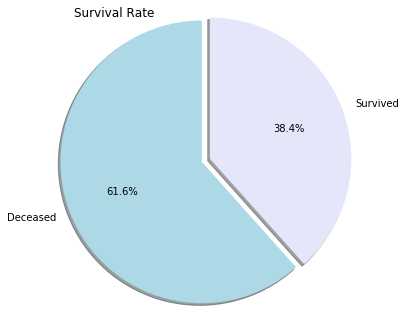

In [19]:
plt.figure(figsize=(10,5))
                         
color = ("lightblue", "lavender")

plt.pie(data["Survived"].value_counts(), data = data, explode=[0.08,0], labels=("Deceased", "Survived"), 
        autopct="%1.1f%%", colors=color, shadow=True, startangle=90, radius=1.3)

plt.title("Survival Rate", loc="left")
plt.show()

- 61.6% passengers did not survive the titanic tragedy.
- 38.4% passengers survived.

### Age and Survived

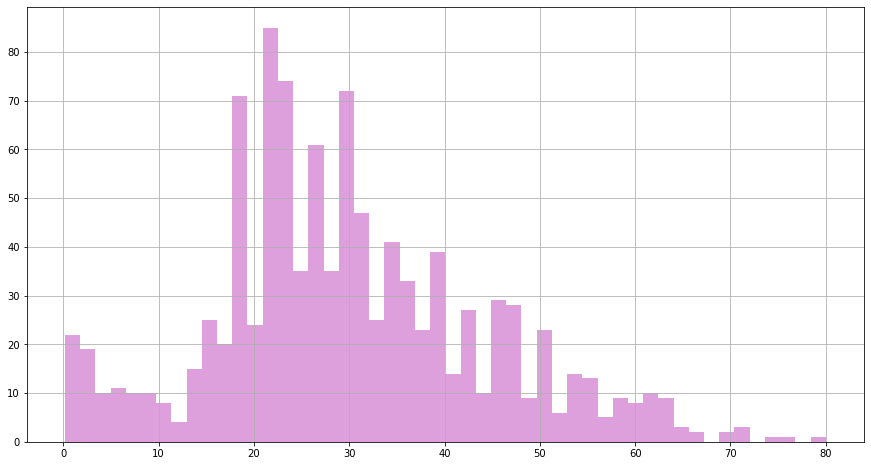

In [20]:
data['Age'].hist(bins = 50, color = 'plum', figsize = (15,8))

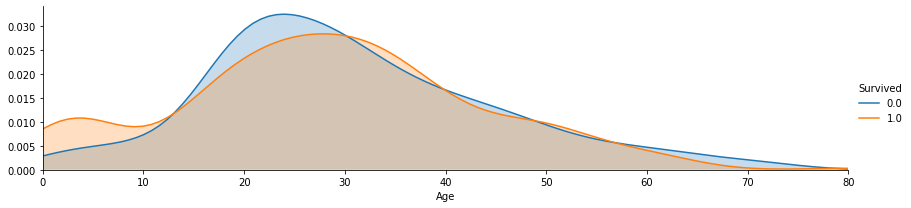

In [21]:
# Peaks for Survived/Not survived passengers by their Age
facet = sns.FacetGrid(data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()

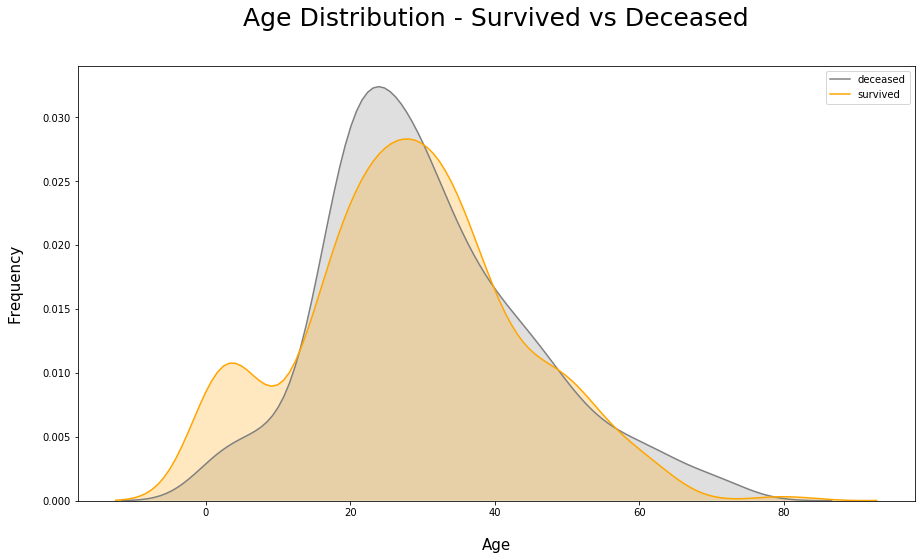

In [22]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax = sns.kdeplot(data.loc[(data['Survived'] == 0),'Age'] , color='gray',shade=True,label='deceased')
ax = sns.kdeplot(data.loc[(data['Survived'] == 1),'Age'] , color='orange',shade=True, label='survived')

plt.title('Age Distribution - Survived vs Deceased', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

### Fare and Survived

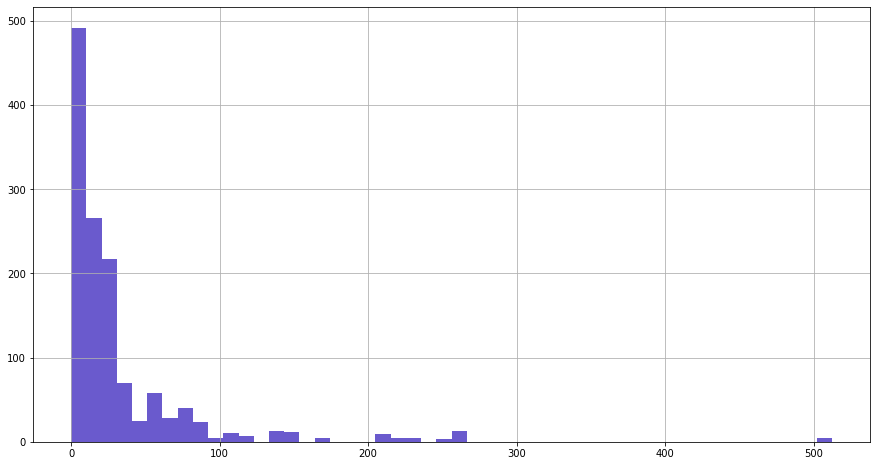

In [23]:
data['Fare'].hist(bins = 50, color = 'slateblue', figsize = (15,8))

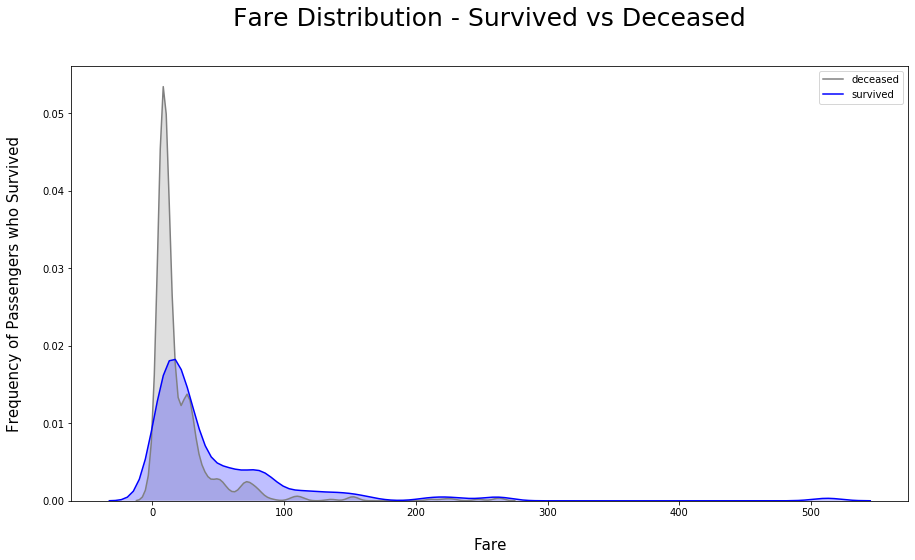

In [24]:
# Peaks for Survived vs Deceased passengers by their Fare using a Kernel Density Plot
fig = plt.figure(figsize=(15,8))
ax = sns.kdeplot(data.loc[(data['Survived'] == 0),'Fare'] , color='gray',shade=True,label='deceased')
ax = sns.kdeplot(data.loc[(data['Survived'] == 1),'Fare'] , color='b',shade=True, label='survived')

plt.title('Fare Distribution - Survived vs Deceased', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passengers who Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);

### Pclass and Survived

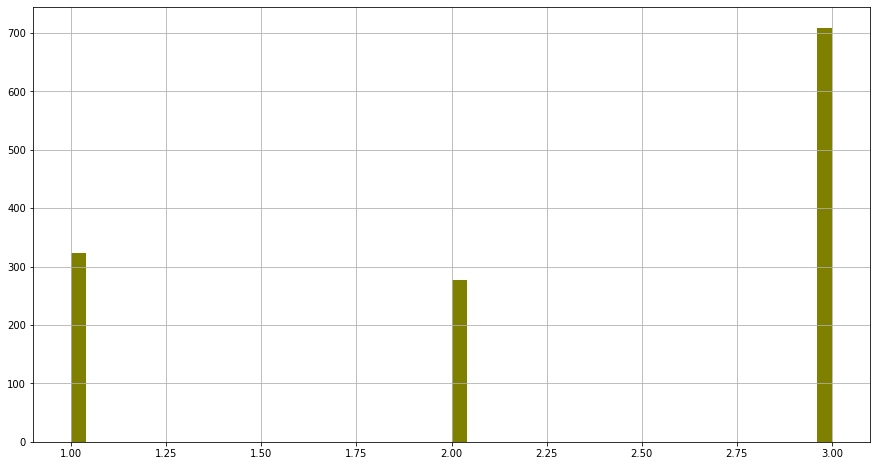

In [25]:
data['Pclass'].hist(bins = 50, color = 'olive', figsize = (15,8))

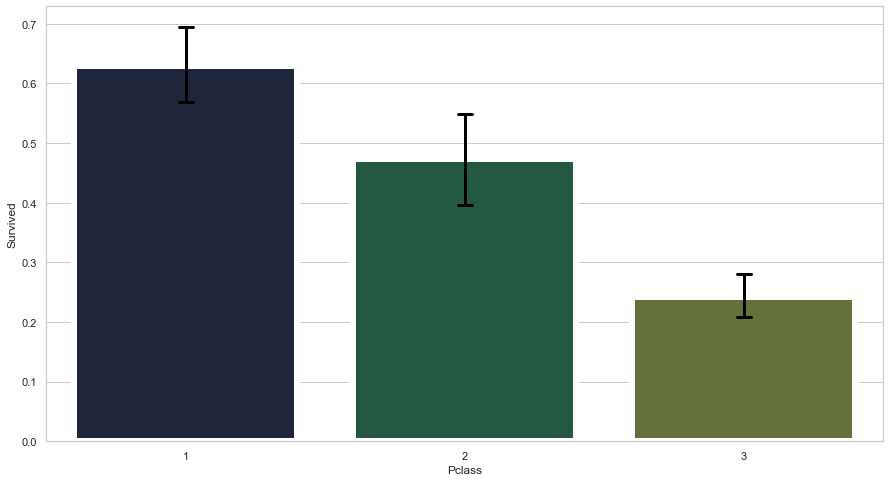

In [26]:
pal = sns.color_palette("cubehelix")
sns.set(style="whitegrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Pclass", y = "Survived", data=data, palette = pal, linewidth=6,
                 capsize = .05,errcolor='black',errwidth = 3)

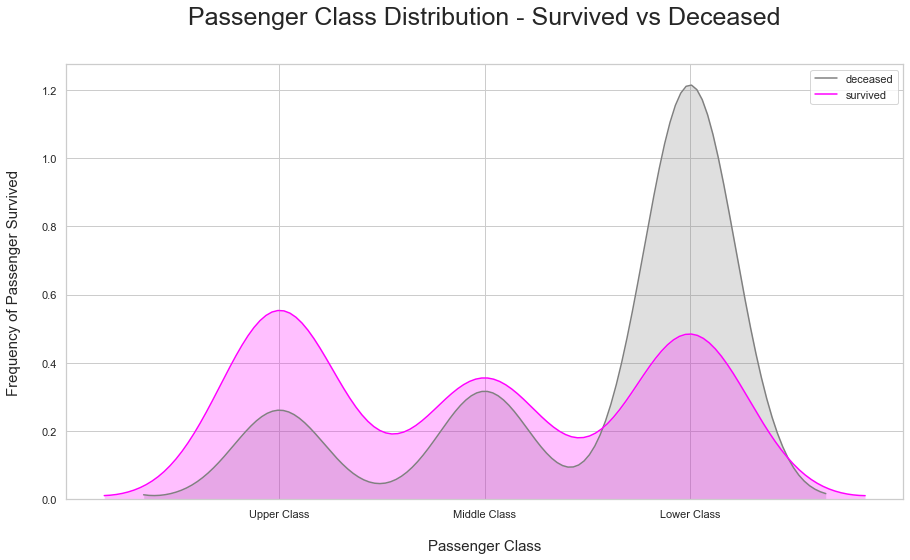

In [27]:
# # Peaks for Survived vs Deceased passengers by their Class using a Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax = sns.kdeplot(data.Pclass[data.Survived == 0], color='gray', shade=True, label='deceased')
ax = sns.kdeplot(data.loc[(data['Survived'] == 1),'Pclass'], color='magenta', shade=True, label='survived')

plt.title('Passenger Class Distribution - Survived vs Deceased', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)

# Convert xticks into words clearer understanding
labels = ['Upper Class', 'Middle Class', 'Lower Class']
plt.xticks(sorted(data.Pclass.unique()), labels);

### SibSp and Survived

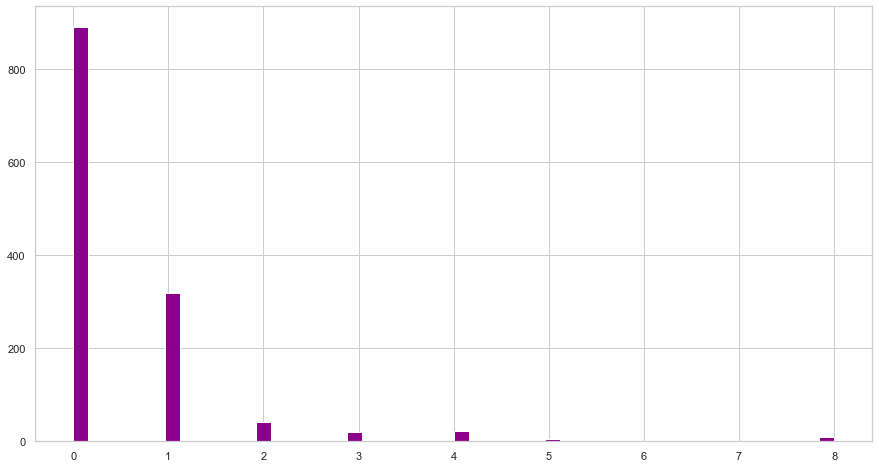

In [28]:
data['SibSp'].hist(bins = 50, color = 'darkmagenta', figsize = (15,8))

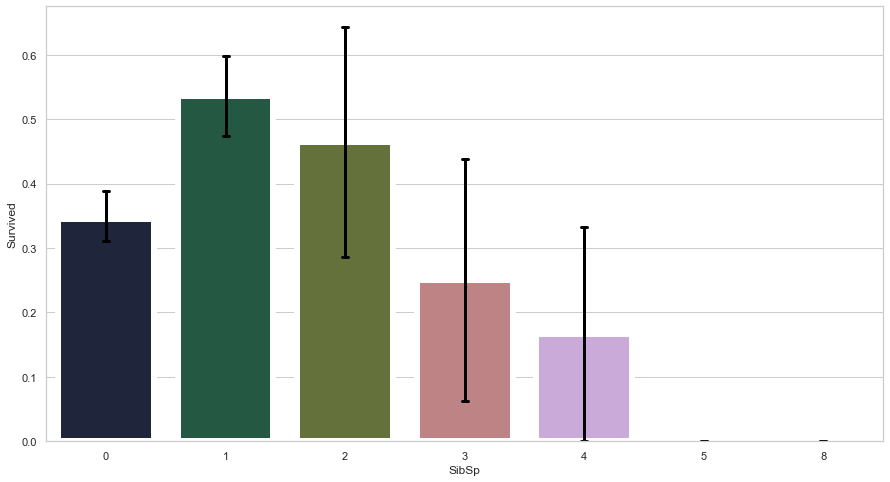

In [29]:
pal = sns.color_palette("cubehelix")
sns.set(style="whitegrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "SibSp", y = "Survived", data=data, palette = pal, linewidth=6,
                 capsize = .05,errcolor='black',errwidth = 3)

### Parch and Survived

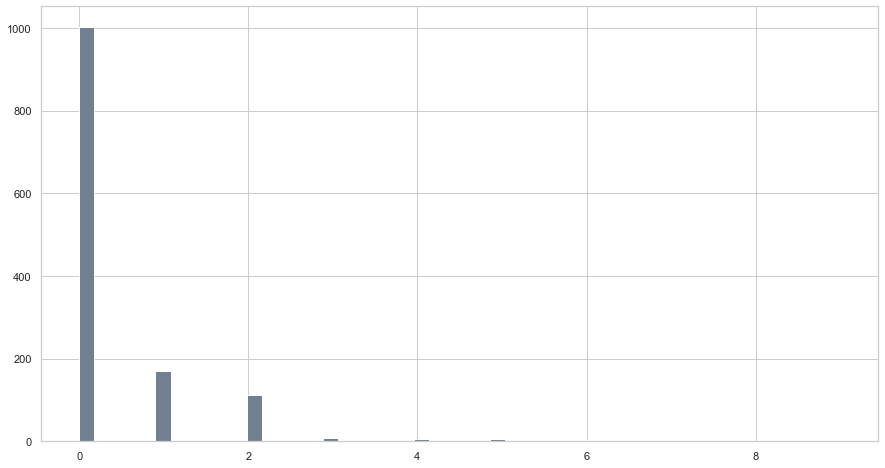

In [30]:
data['Parch'].hist(bins = 50, color = 'slategray', figsize = (15,8))

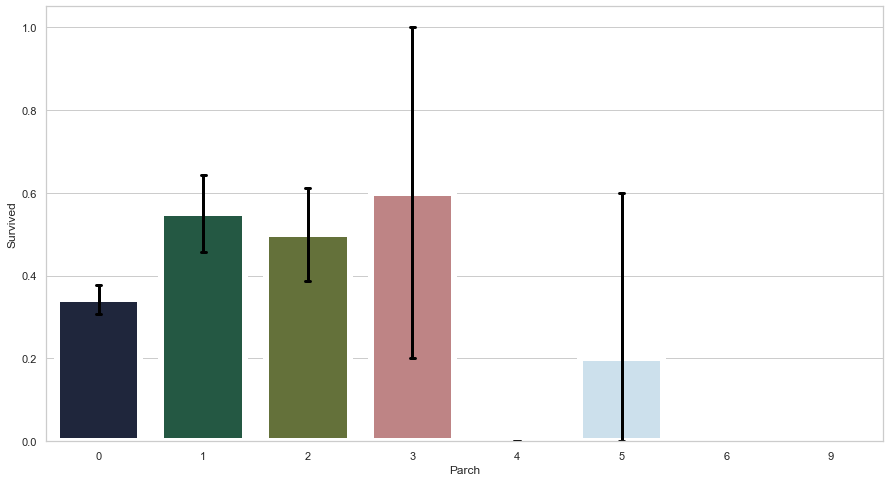

In [31]:
pal = sns.color_palette("cubehelix")
sns.set(style="whitegrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Parch", y = "Survived", data=data, palette = pal, linewidth=6,
                 capsize = .05,errcolor='black',errwidth = 3)


### Gender and Survived

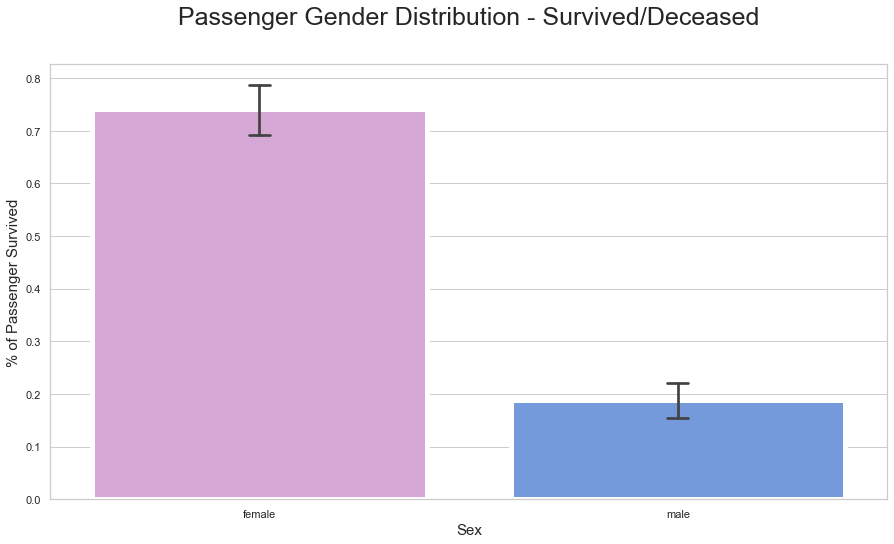

In [32]:
pal = {'male':"cornflowerblue", 'female':"plum"}
sns.set(style="whitegrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Sex", y = "Survived", data=data, palette = pal,linewidth=5,order = ['female','male'],capsize = .05)

plt.title("Passenger Gender Distribution - Survived/Deceased", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of Passenger Survived", fontsize = 15, )
plt.xlabel("Sex",fontsize = 15);

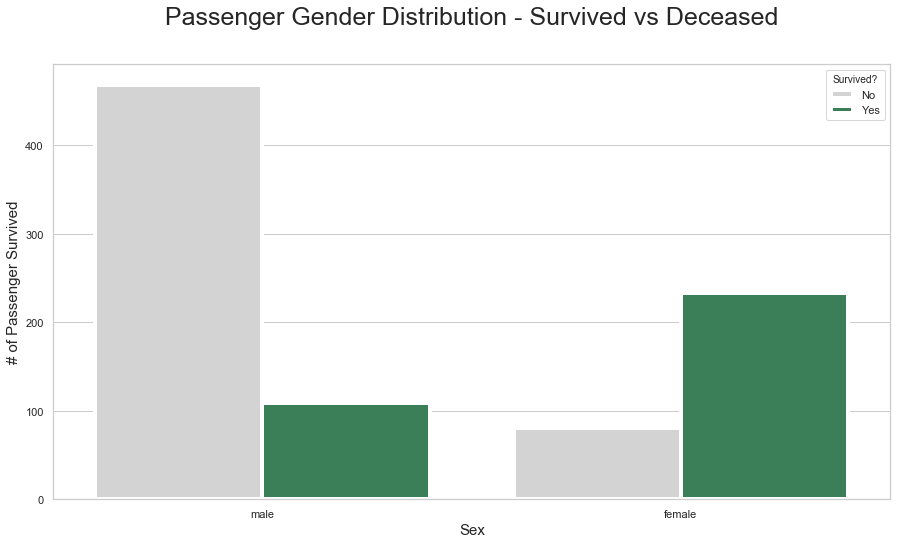

In [33]:
# Split the number of passengers between Survived and Non-Survived by Gender
pal = {1:"seagreen", 0:"lightgray"}
sns.set(style="whitegrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex", hue="Survived",data = data, linewidth=4, palette = pal)

plt.title("Passenger Gender Distribution - Survived vs Deceased", fontsize = 25, pad=40)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

# Key 
legend = ax.get_legend()
legend.set_title("Survived?")
legends = legend.texts
legends[0].set_text("No")
legends[1].set_text("Yes")
plt.show()

### Other relations

**Sex, Pclass, Embarked**

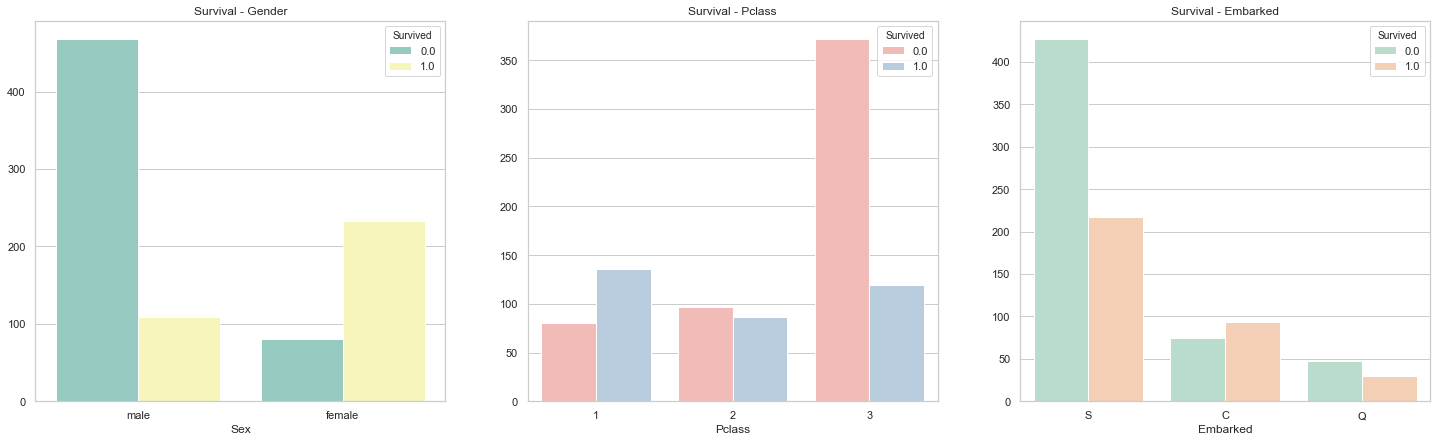

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(25,7))

# Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=data, ax=axes[0], palette="Set3")
axes[0].set_title('Survival - Gender')
axes[0].set_ylabel('')

# Survival by Class
sns.countplot(x='Pclass', hue='Survived', data=data, ax=axes[1], palette="Pastel1")
axes[1].set_title('Survival - Pclass')
axes[1].set_ylabel('')

# Survival by Embarkation
sns.countplot(x='Embarked', hue='Survived', data=data, ax=axes[2], palette="Pastel2")
axes[2].set_title('Survival - Embarked')
axes[2].set_ylabel('')

plt.show()

# Legend/Key
# 0 = Deceased
# 1 = Survived

**Age, Class, & Gender**

In [35]:
# Survival rate between age, class & gender
age = pd.cut(data['Age'], [0,18,30,80])
data.pivot_table('Survived', ('Sex', age), 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 30]  0.958333  0.900000  0.500000
       (30, 80]  0.980000  0.900000  0.304348
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 30]  0.428571  0.027027  0.147541
       (30, 80]  0.360000  0.106383  0.112500

![newspaper](Img/newspaper.jpg)

##### Statistical Inferences
- Females from 2nd class (infants and teenagers, 0-18) have a survival rate of 100%.
- A female who was 30 years old and above and belonged to 1st class, the chances of survival were 98%.
- Survival rate of adult females from 3rd class is 30.4%, while adult males from 2nd class is 10.6%.
- Highest survival rate in males from 1st class is 80% (infants and teenagers, 0-18).
- Survival rate of males from 2nd class under the 18-30 age group is almost negliable at only 2.7%.

**Fare and Class**

![fare](Img/boardpass.png)

<function matplotlib.pyplot.show(*args, **kw)>

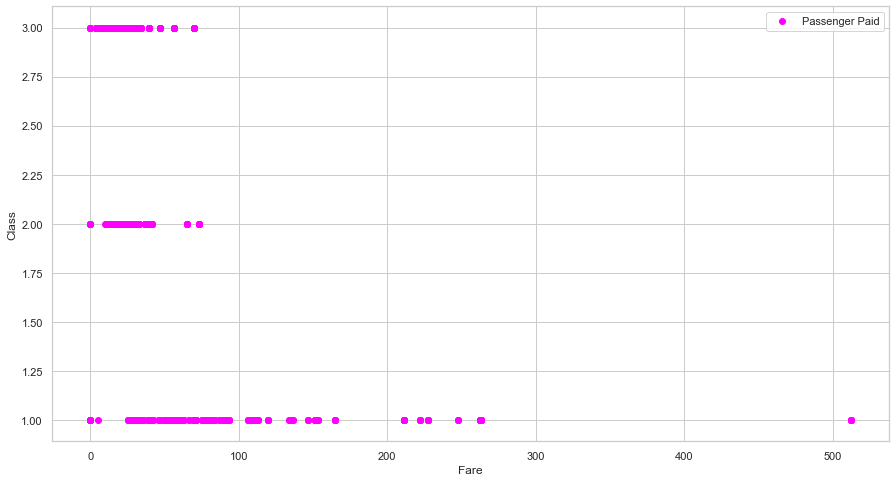

In [36]:
# Prices paid by each class
plt.figure(figsize=(15,8))
plt.scatter(data['Fare'], data['Pclass'], label='Passenger Paid', color='magenta')
plt.ylabel('Class')
plt.xlabel('Fare')
plt.legend()
plt.show

- Some passengers were travelling at a fare of 0 (for free), while other passengers paid more than £100 belonging to 1st class.

### Data Cleaning

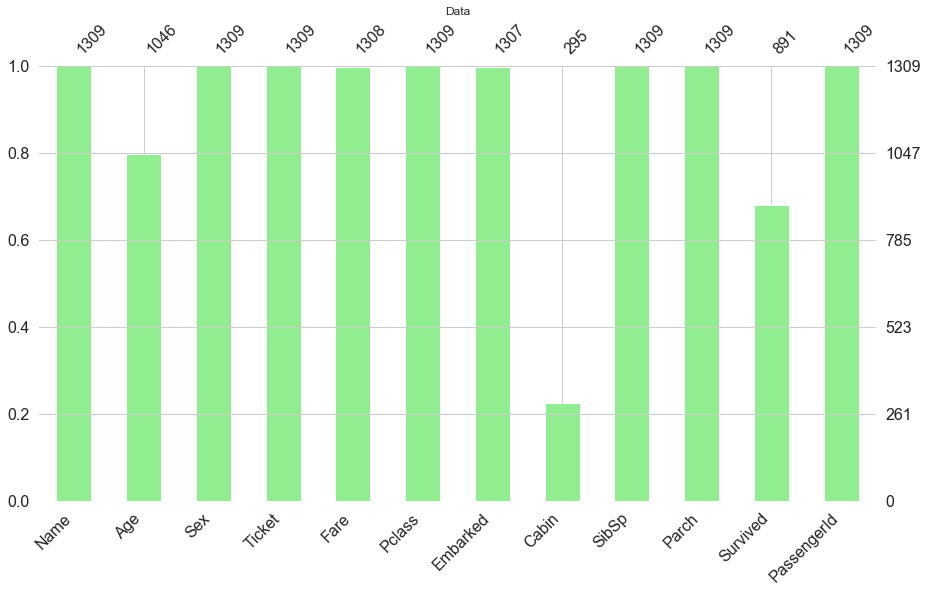

In [37]:
fig, axes = plt.subplots(figsize=(15,8), sharey=True)
msno.bar(data, ax=axes, color='lightgreen')
axes.set_title("Data")

plt.show()

In [38]:
# Feature names
print("Feature names:", ", ".join(data.columns))

Feature names: Name, Age, Sex, Ticket, Fare, Pclass, Embarked, Cabin, SibSp, Parch, Survived, PassengerId


In [39]:
# Number of missing values for each feature
pd.isnull(data).sum()

Name              0
Age             263
Sex               0
Ticket            0
Fare              1
Pclass            0
Embarked          2
Cabin          1014
SibSp             0
Parch             0
Survived        418
PassengerId       0
dtype: int64

**Handle missing values**

In [40]:
# Size of dataset before removing missing values
data.shape

(1309, 12)

#### **Observation**
- There are 263 NaN values in **Age** & 1014 NaN values in the **Cabin** column.
- In **Cabin** more than 75% values are empty, therefore the best thing to do is discard the feature.

In [41]:
# Remove the feature if more than 40% of its values are missing
data.drop(['Cabin'], axis=1, inplace=True)
data

,Name,Age,Sex,Ticket,Fare,Pclass,Embarked,SibSp,Parch,Survived,PassengerId
0,"Braund, Mr. Owen Harris",22.0,male,A/5 21171,7.2500,3,S,1,0,0.0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,PC 17599,71.2833,1,C,1,0,1.0,2
2,"Heikkinen, Miss. Laina",26.0,female,STON/O2. 3101282,7.9250,3,S,0,0,1.0,3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,113803,53.1000,1,S,1,0,1.0,4
4,"Allen, Mr. William Henry",35.0,male,373450,8.0500,3,S,0,0,0.0,5
5,"Moran, Mr. James",NaN,male,330877,8.4583,3,Q,0,0,0.0,6
6,"McCarthy, Mr. Timothy J",54.0,male,17463,51.8625,1,S,0,0,0.0,7
7,"Palsson, Master. Gosta Leonard",2.0,male,349909,21.0750,3,S,3,1,0.0,8
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,female,347742,11.1333,3,S,0,2,1.0,9
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,female,237736,30.0708,2,C,1,0,1.0,10


**Age has missing NaN values**
- Age = 263
- Age is a numeric column.
- Therefore, it is best to fill NaN values by the mean of all the other non-NaN values.

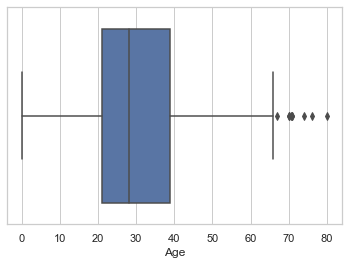

In [42]:
# Checking for outliers, helps to decide what should be used, Mean or Media to fill NAN values.
sns.boxplot(x=data["Age"])
plt.show()

In [43]:
# Find mean of Age
age_mean = data['Age'].mean()
print(age_mean)

29.881137667304014


In [44]:
# Fill NaN values by the mean of all other non-NaN values
data['Age'].fillna(age_mean, inplace=True)

In [45]:
data.isna().sum()

Name             0
Age              0
Sex              0
Ticket           0
Fare             1
Pclass           0
Embarked         2
SibSp            0
Parch            0
Survived       418
PassengerId      0
dtype: int64

**Rows containing missing values less than 5%**
- Embarked = 2
- Fare = 1

#####  Impute the features with a tiny fraction of values:
- Impute Embarked missing values with the mode "S"

In [46]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [47]:
# Impute 'Embarked' missing values with the mode, "S"
data["Embarked"] = data["Embarked"].fillna("S")

In [48]:
data.isna().sum()

Name             0
Age              0
Sex              0
Ticket           0
Fare             1
Pclass           0
Embarked         0
SibSp            0
Parch            0
Survived       418
PassengerId      0
dtype: int64

- Since the value for Fare is too small we can detect if there's any possible **outliers** using a boxplot.

In [49]:
# Size of data before removing outliers
data.shape

(1309, 11)

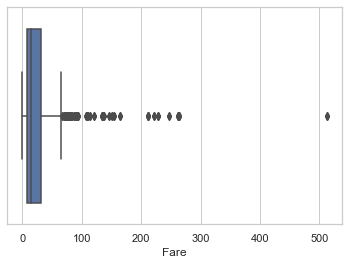

In [50]:
sns.boxplot(x=data["Fare"])
plt.show()

- For the majority of passengers, Fare price is less than 250.

In [51]:
# Only take rows which have "Fare" value less than or equal to 250.
data = data[data['Fare'] < 250]

# Size of data after removing outliers
data.shape

(1291, 11)

In [52]:
data = data.dropna(axis=0)
data

,Name,Age,Sex,Ticket,Fare,Pclass,Embarked,SibSp,Parch,Survived,PassengerId
0,"Braund, Mr. Owen Harris",22.000000,male,A/5 21171,7.2500,3,S,1,0,0.0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,female,PC 17599,71.2833,1,C,1,0,1.0,2
2,"Heikkinen, Miss. Laina",26.000000,female,STON/O2. 3101282,7.9250,3,S,0,0,1.0,3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,female,113803,53.1000,1,S,1,0,1.0,4
4,"Allen, Mr. William Henry",35.000000,male,373450,8.0500,3,S,0,0,0.0,5
5,"Moran, Mr. James",29.881138,male,330877,8.4583,3,Q,0,0,0.0,6
6,"McCarthy, Mr. Timothy J",54.000000,male,17463,51.8625,1,S,0,0,0.0,7
7,"Palsson, Master. Gosta Leonard",2.000000,male,349909,21.0750,3,S,3,1,0.0,8
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,female,347742,11.1333,3,S,0,2,1.0,9
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,female,237736,30.0708,2,C,1,0,1.0,10


In [53]:
# No missing values, Data is cleaned
pd.isnull(data).sum()

Name           0
Age            0
Sex            0
Ticket         0
Fare           0
Pclass         0
Embarked       0
SibSp          0
Parch          0
Survived       0
PassengerId    0
dtype: int64

In [54]:
# Size of data after handling missing values
data.shape

(882, 11)

### Correlation Coefficients

In [55]:
# Correlation coefficient of each numerical feature
data.corr() 

,Age,Fare,Pclass,SibSp,Parch,Survived,PassengerId
Age,1.000000,0.110832,-0.335433,-0.230067,-0.191152,-0.067812,0.030651
Fare,0.110832,1.000000,-0.620432,0.170053,0.197772,0.271495,0.018032
Pclass,-0.335433,-0.620432,1.000000,0.100419,0.045572,-0.332033,-0.038471
SibSp,-0.230067,0.170053,0.100419,1.000000,0.405132,-0.041964,-0.049933
Parch,-0.191152,0.197772,0.045572,0.405132,1.000000,0.078480,0.004346
Survived,-0.067812,0.271495,-0.332033,-0.041964,0.078480,1.000000,-0.006765
PassengerId,0.030651,0.018032,-0.038471,-0.049933,0.004346,-0.006765,1.000000


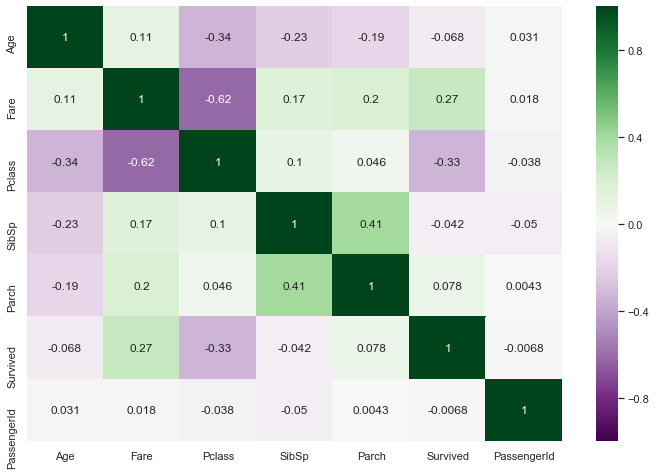

In [56]:
# Correlation Matrix Heatmap
corrmat = data.corr()
fig, ax = plt.subplots(figsize=(12,8)) 
sns.heatmap(data.corr(),
            vmin=-1,
            cmap='PRGn',
            annot=True);

In [57]:
# Calculate correlation coefficients
print("Correlation coefficient for Fare vs passengers who Survived:", 
np.corrcoef(data['Fare'], data['Survived']))

print("Correlation coefficient for Age vs passengers who Survived:", 
np.corrcoef(data['Age'], data['Survived']))

print("Correlation coefficient for Pclass vs passengers who Survived:", 
np.corrcoef(data['Pclass'], data['Survived']))

print("Correlation coefficient for Parch vs passengers who Survived:", 
np.corrcoef(data['Parch'], data['Survived']))

print("Correlation coefficient for PassengerId vs passengers who Survived:", 
np.corrcoef(data['PassengerId'], data['Survived']))

print("Correlation coefficient for SibSp vs passengers who Survived:", 
np.corrcoef(data['SibSp'], data['Survived']))

Correlation coefficient for Fare vs passengers who Survived: [[1.         0.27149542]
 [0.27149542 1.        ]]
Correlation coefficient for Age vs passengers who Survived: [[ 1.         -0.06781225]
 [-0.06781225  1.        ]]
Correlation coefficient for Pclass vs passengers who Survived: [[ 1.         -0.33203314]
 [-0.33203314  1.        ]]
Correlation coefficient for Parch vs passengers who Survived: [[1.         0.07847971]
 [0.07847971 1.        ]]
Correlation coefficient for PassengerId vs passengers who Survived: [[ 1.         -0.00676491]
 [-0.00676491  1.        ]]
Correlation coefficient for SibSp vs passengers who Survived: [[ 1.         -0.04196449]
 [-0.04196449  1.        ]]


- Strongest correlation: Fare and Survived
- Weakest correlation: PassengerId and Survived, SibSp and Survived, Parch and Survived

- From the plots and correlation matrix we can conclude that **Fare** is highly correlated with Survived.
- **PassengerId**, **SibSp** and **Parch** have zero correlation wirh **Survived** for certain values, therefore it doesn't give any useful information.


### Rare Names

In [58]:
for dataset in data:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(data['Title'], data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [59]:
for dataset in data:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    
data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.694444
2,Mr,0.153996
3,Mrs,0.793651
4,Rare,0.347826


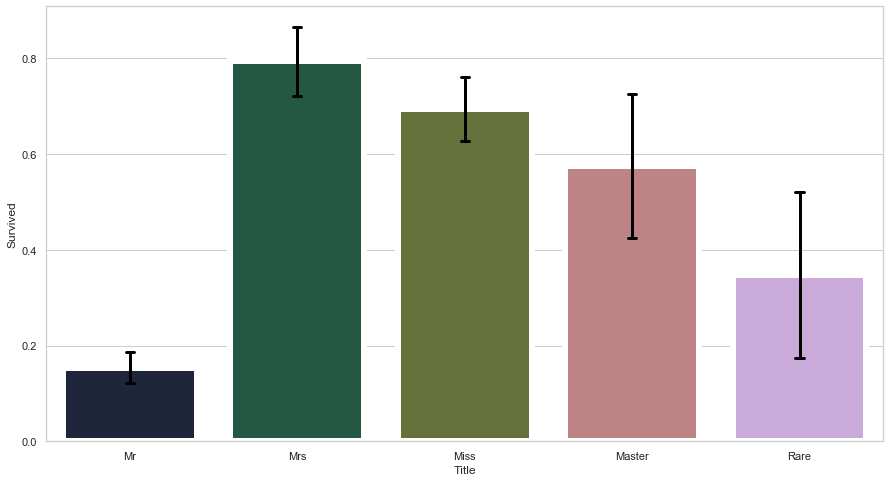

In [60]:
pal = sns.color_palette("cubehelix")
sns.set(style="whitegrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Title", y = "Survived", data=data, palette = pal, linewidth=6,
                 capsize = .05,errcolor='black',errwidth = 3)

In [61]:
data['Title'].value_counts()

Mr        513
Miss      180
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

- People with Mrs, Miss (females) and Master (males) titles had high chances of survival while Mr. had the lowest.
- Master (males) most likely indicates that males who were in upper class had better chances of surving than males in lower class, hence, the title Master.

## Stage II: Model Construction

### Data Preparation for Machine Learning

#### 'Gender'

In [62]:
# Survival rate by gender
data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.737864
male,0.186736


- Survival chances of males were very low when compared to females.

In [63]:
# Survival rate by gender and class
data.pivot_table('Survived', index = 'Sex', columns = 'Pclass')

Pclass,1,2,3
Sex,,,
female,0.966292,0.921053,0.500000
male,0.364407,0.157407,0.135447


- 1st class had the highest survival rate.
- Females from 1st class had the highest survival rate of 96.6%.
- Survival rate of males in 1st class is 36.4% which is still lower than the survival chances of females in 3rd class which is 50%
- *Titanic, 1997* Movie reference: This is probably why Rose had a higher chance of survival and Jack didn't. \
She was a female in 1st class and Jack was a male in the 3rd class. She survived but he didn't.
- Unfortunately, all three classes were treated very differently when on board during the trip and after the sinking.

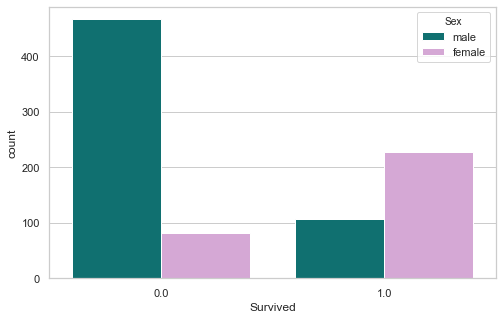

In [64]:
# Visualization of Survival Rate based on Gender
pal = {'male':"teal", 'female':"plum"}
sns.set(style="whitegrid")
plt.subplots(figsize = (8,5))
sns.countplot(x = 'Survived', hue = 'Sex', data = data, palette = pal)

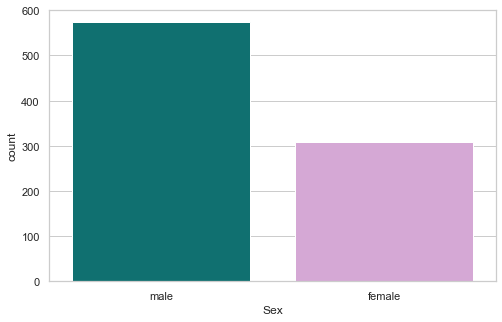

In [65]:
# Visualization categorized by female and male
pal = {'male':"teal", 'female':"plum"}
sns.set(style="whitegrid")
plt.subplots(figsize = (8,5))
sns.countplot(data['Sex'], palette = pal)

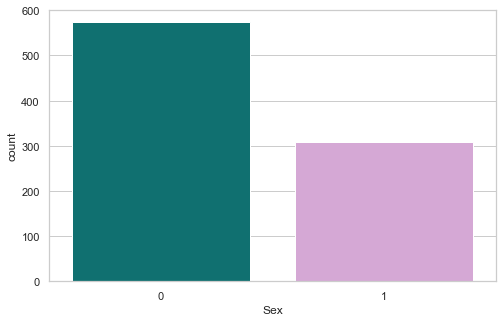

In [66]:
# Convert 'Sex' variable to integer form, Male: 0 and Female: 1
data["Sex"][data["Sex"] == "male"] = 0
data["Sex"][data["Sex"] == "female"] = 1

pal = {0:"teal", 1:"plum"}
sns.set(style="whitegrid")
plt.subplots(figsize = (8,5))
sns.countplot(data['Sex'], palette = pal)

In [67]:
data.head(10)

,Name,Age,Sex,Ticket,Fare,Pclass,Embarked,SibSp,Parch,Survived,PassengerId,Title
0,"Braund, Mr. Owen Harris",22.000000,0,A/5 21171,7.2500,3,S,1,0,0.0,1,Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,PC 17599,71.2833,1,C,1,0,1.0,2,Mrs
2,"Heikkinen, Miss. Laina",26.000000,1,STON/O2. 3101282,7.9250,3,S,0,0,1.0,3,Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,113803,53.1000,1,S,1,0,1.0,4,Mrs
4,"Allen, Mr. William Henry",35.000000,0,373450,8.0500,3,S,0,0,0.0,5,Mr
5,"Moran, Mr. James",29.881138,0,330877,8.4583,3,Q,0,0,0.0,6,Mr
6,"McCarthy, Mr. Timothy J",54.000000,0,17463,51.8625,1,S,0,0,0.0,7,Mr
7,"Palsson, Master. Gosta Leonard",2.000000,0,349909,21.0750,3,S,3,1,0.0,8,Master
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,1,347742,11.1333,3,S,0,2,1.0,9,Mrs
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,1,237736,30.0708,2,C,1,0,1.0,10,Mrs


#### 'Embarked'

In [68]:
print('Boarded passengers grouped by port of embarkation (*C* = Cherbourg, *Q* = Queenstown, *S* = Southampton):')
print(data['Embarked'].value_counts())

Boarded passengers grouped by port of embarkation (*C* = Cherbourg, *Q* = Queenstown, *S* = Southampton):
S    642
C    163
Q     77
Name: Embarked, dtype: int64


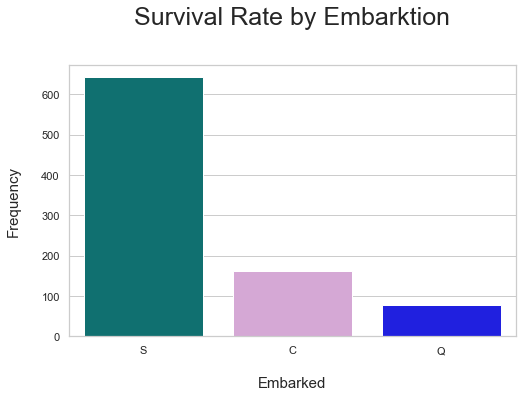

In [69]:
# Embark_S, Embark_C, Embark_Q
pal = {'S':"teal", 'C':"plum" , "Q":"blue"}
sns.set(style="whitegrid")
plt.subplots(figsize = (8,5))
sns.countplot(data['Embarked'], palette = pal)
plt.title('Survival Rate by Embarktion', fontsize = 25, pad = 40)
plt.xlabel("Embarked", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

In [70]:
print('The most common boarding port of embarkation is %s.' %data['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


In [71]:
# Look for missing values again, if any
data.isnull().sum().sort_values(ascending = False)

Title          0
PassengerId    0
Survived       0
Parch          0
SibSp          0
Embarked       0
Pclass         0
Fare           0
Ticket         0
Sex            0
Age            0
Name           0
dtype: int64

- No missing values found.

### **Converting categorical variables to numeric:**

- Create categorical variables for **Embarked, Sex, and Title**
- Use pandas.get_dummies() for categorical variables

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 0 to 890
Data columns (total 12 columns):
Name           882 non-null object
Age            882 non-null float64
Sex            882 non-null object
Ticket         882 non-null object
Fare           882 non-null float64
Pclass         882 non-null int64
Embarked       882 non-null object
SibSp          882 non-null int64
Parch          882 non-null int64
Survived       882 non-null float64
PassengerId    882 non-null int64
Title          882 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 129.6+ KB


In [73]:
# Print the unique values of the categorical columns
print(data['Sex'].unique())
print(data['Embarked'].unique())
print(data['Title'].unique())

[0 1]
['S' 'C' 'Q']
['Mr' 'Mrs' 'Miss' 'Master' 'Rare']


- Gender **(Sex)** has already been previously converted to numerical values.
- We will convert **Title** via LabelEncoder from sci-kit learn and add indicator variables for **Embarked** using dummies.

In [74]:
# LabelEncoder for Title
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Title'] = le.fit_transform(data['Title'])
data.head(15)

,Name,Age,Sex,Ticket,Fare,Pclass,Embarked,SibSp,Parch,Survived,PassengerId,Title
0,"Braund, Mr. Owen Harris",22.000000,0,A/5 21171,7.2500,3,S,1,0,0.0,1,2
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,PC 17599,71.2833,1,C,1,0,1.0,2,3
2,"Heikkinen, Miss. Laina",26.000000,1,STON/O2. 3101282,7.9250,3,S,0,0,1.0,3,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,113803,53.1000,1,S,1,0,1.0,4,3
4,"Allen, Mr. William Henry",35.000000,0,373450,8.0500,3,S,0,0,0.0,5,2
5,"Moran, Mr. James",29.881138,0,330877,8.4583,3,Q,0,0,0.0,6,2
6,"McCarthy, Mr. Timothy J",54.000000,0,17463,51.8625,1,S,0,0,0.0,7,2
7,"Palsson, Master. Gosta Leonard",2.000000,0,349909,21.0750,3,S,3,1,0.0,8,0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,1,347742,11.1333,3,S,0,2,1.0,9,3
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,1,237736,30.0708,2,C,1,0,1.0,10,3


In [75]:
# Add indicator variables for Embarked using pandas.get_dummies() 
data = pd.get_dummies(data, columns =['Embarked'])

# Drop some unnecessary variables
data.drop('PassengerId', axis=1, inplace=True)
data.drop('Name', axis=1, inplace=True)
data.drop('Ticket', axis=1, inplace=True)

In [76]:
data.columns

Index(['Age', 'Sex', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived', 'Title',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [77]:
data = data
data.head(10)

,Age,Sex,Fare,Pclass,SibSp,Parch,Survived,Title,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,0,7.2500,3,1,0,0.0,2,0,0,1
1,38.000000,1,71.2833,1,1,0,1.0,3,1,0,0
2,26.000000,1,7.9250,3,0,0,1.0,1,0,0,1
3,35.000000,1,53.1000,1,1,0,1.0,3,0,0,1
4,35.000000,0,8.0500,3,0,0,0.0,2,0,0,1
5,29.881138,0,8.4583,3,0,0,0.0,2,0,1,0
6,54.000000,0,51.8625,1,0,0,0.0,2,0,0,1
7,2.000000,0,21.0750,3,3,1,0.0,0,0,0,1
8,27.000000,1,11.1333,3,0,2,1.0,3,0,0,1
9,14.000000,1,30.0708,2,1,0,1.0,3,1,0,0


- All categorical features are now converted to numeric values.

#### Pre-Modeling Tasks
- Save the target column 'Survived'

In [78]:
# Save the target column 
target = data['Survived'].tolist()
data.drop(['Survived'], axis=1, inplace=True)

### Train_Test_Split
- training set (80%) and validation set (20%)

In [79]:
# Further split the data into training set (80%) and validation set (20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, train_size= 0.8, test_size=0.2)

X_train.shape, X_test.shape, len(y_train), len(y_test)

((705, 10), (177, 10), 705, 177)

### Feature Scaling
- StandardScaler standardizes the features by removing the mean and scaling to unit variance.

**Before scaling**

In [80]:
data.sample(5)

,Age,Sex,Fare,Pclass,SibSp,Parch,Title,Embarked_C,Embarked_Q,Embarked_S
251,29.0,1,10.4625,3,1,1,3,0,0,1
690,31.0,0,57.0000,1,1,0,2,0,0,1
20,35.0,0,26.0000,2,0,0,2,0,0,1
136,19.0,1,26.2833,1,0,2,1,0,0,1
333,16.0,0,18.0000,3,2,0,2,0,0,1


In [81]:
headers = X_train.columns 

X_train.head()

,Age,Sex,Fare,Pclass,SibSp,Parch,Title,Embarked_C,Embarked_Q,Embarked_S
715,19.0,0,7.6500,3,0,0,2,0,0,1
147,9.0,1,34.3750,3,2,2,1,0,0,1
716,38.0,1,227.5250,1,0,0,1,1,0,0
529,23.0,0,11.5000,2,2,1,2,0,0,1
189,36.0,0,7.8958,3,0,0,2,0,0,1


### Feature Scaling
- using StandardScaler()

In [82]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

**After Scaling**

In [83]:
pd.DataFrame(X_train, columns=headers).head()

,Age,Sex,Fare,Pclass,SibSp,Parch,Title,Embarked_C,Embarked_Q,Embarked_S
0,-0.835124,-0.738954,-0.587960,0.820070,-0.477889,-0.466775,0.112431,-0.477727,-0.315981,0.618347
1,-1.598624,1.353265,0.151654,0.820070,1.363159,1.970826,-1.145724,-0.477727,-0.315981,0.618347
2,0.615527,1.353265,5.497074,-1.598964,-0.477889,-0.466775,-1.145724,2.093246,-0.315981,-1.617215
3,-0.529724,-0.738954,-0.481411,-0.389447,1.363159,0.752026,0.112431,-0.477727,-0.315981,0.618347
4,0.462827,-0.738954,-0.581157,0.820070,-0.477889,-0.466775,0.112431,-0.477727,-0.315981,0.618347


### Feature Engineering

**Family Size**
- We can create a column that focuses on family size. Perhaps families had a higher chance of being rescued or a person who might have been alone?

In [84]:
# Creating new family_size column
data['Family_Size'] = data['SibSp'] + data['Parch']
data.head(10)

,Age,Sex,Fare,Pclass,SibSp,Parch,Title,Embarked_C,Embarked_Q,Embarked_S,Family_Size
0,22.000000,0,7.2500,3,1,0,2,0,0,1,1
1,38.000000,1,71.2833,1,1,0,3,1,0,0,1
2,26.000000,1,7.9250,3,0,0,1,0,0,1,0
3,35.000000,1,53.1000,1,1,0,3,0,0,1,1
4,35.000000,0,8.0500,3,0,0,2,0,0,1,0
5,29.881138,0,8.4583,3,0,0,2,0,1,0,0
6,54.000000,0,51.8625,1,0,0,2,0,0,1,0
7,2.000000,0,21.0750,3,3,1,0,0,0,1,4
8,27.000000,1,11.1333,3,0,2,3,0,0,1,2
9,14.000000,1,30.0708,2,1,0,3,1,0,0,1


**Fare Per Person**
- We can also create a column that focuses Fare Per Person based on class.
- This feature could also be a potential indicator of the social status of the passenger.

In [85]:
# Fare Per Person based on class
data['Fare_Per_Person'] = data ['Fare'] / (data['Pclass'] + 1 )
data.head(20)

,Age,Sex,Fare,Pclass,SibSp,Parch,Title,Embarked_C,Embarked_Q,Embarked_S,Family_Size,Fare_Per_Person
0,22.000000,0,7.2500,3,1,0,2,0,0,1,1,1.812500
1,38.000000,1,71.2833,1,1,0,3,1,0,0,1,35.641650
2,26.000000,1,7.9250,3,0,0,1,0,0,1,0,1.981250
3,35.000000,1,53.1000,1,1,0,3,0,0,1,1,26.550000
4,35.000000,0,8.0500,3,0,0,2,0,0,1,0,2.012500
5,29.881138,0,8.4583,3,0,0,2,0,1,0,0,2.114575
6,54.000000,0,51.8625,1,0,0,2,0,0,1,0,25.931250
7,2.000000,0,21.0750,3,3,1,0,0,0,1,4,5.268750
8,27.000000,1,11.1333,3,0,2,3,0,0,1,2,2.783325
9,14.000000,1,30.0708,2,1,0,3,1,0,0,1,10.023600


### Building Models

1. #### *Logistic Regression*

In [86]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

predictions_lg = log.predict(X_test)

2. #### *Support Vector Machines* (SVM)

In [87]:
# Support Vector Machines
from sklearn.svm import SVC, LinearSVC
svm = LinearSVC()
svm.fit(X_train,y_train)

predictions_svm = svm.predict(X_test)

3. #### *K-Nearest Neighbor* (kNN)

In [88]:
# kNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,y_train)

predictions_knn = knn.predict(X_test)

4. #### *Stochastic Gradient Descent*

In [89]:
# Stochastic Gradient Descent
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train,y_train)

predictions_sgd = sgd.predict(X_test)

5. #### *Decision Tree*

In [90]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')
dt.fit(X_train,y_train)

predictions_dt = dt.predict(X_test)

** `Gini Impurity` is a metric used to train Decision Trees. 
It measures the probability of incorrectly classifying a randomly chosen element \
in the dataset if it were randomly labeled according to the class distribution in the dataset.

## Stage III: Model Selection and Interpretation

### Model Selection
- cross validation
- confusion matrix, precision, and recall on the validation set
- ROC (Receiver Operating Characteristics) / AUC (Area Under the Curve)

### **Logistic Regression**

In [91]:
# Predictions
print("Predictions:", len(predictions_lg))

# First 10 values of validation predictions
(print("First 10 values of validation Predictions:" , predictions_lg[:10]))

# Accuracy score 
from sklearn.metrics import accuracy_score
print("Accuracy Score:" , accuracy_score(y_test, predictions_lg))
acc_log = round(log.score(X_train, y_train) * 100, 2)

# Classification report, Confusion Matrix.
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:" , confusion_matrix(y_test, predictions_lg))

# Precision
from sklearn.metrics import precision_score
print("Precision Score:" , precision_score(y_test, predictions_lg))

# Recall Score
from sklearn.metrics import recall_score
print("Recall Score:" , recall_score(y_test, predictions_lg))

Predictions: 177
First 10 values of validation Predictions: [1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
Accuracy Score: 0.7627118644067796
Confusion Matrix: [[92 19]
 [23 43]]
Precision Score: 0.6935483870967742
Recall Score: 0.6515151515151515


In [92]:
# Classification Report
print(classification_report(y_test, predictions_lg))

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81       111
         1.0       0.69      0.65      0.67        66

   micro avg       0.76      0.76      0.76       177
   macro avg       0.75      0.74      0.74       177
weighted avg       0.76      0.76      0.76       177



In [93]:
# Cross Validation
from sklearn.model_selection import cross_val_score
log = LogisticRegression()
scores = cross_val_score(log, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77464789 0.77464789 0.83098592 0.87323944 0.77464789 0.76056338
 0.81428571 0.8        0.77142857 0.7826087 ]
Mean: 0.7957055375732656
Standard Deviation: 0.03308476902801816


***ROC AUC Score: 0.81


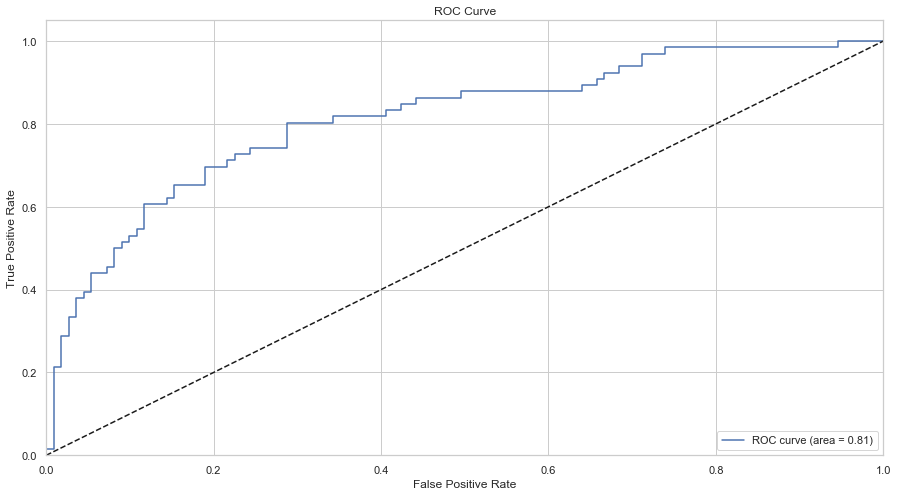

In [94]:
# ROC/AUC
from sklearn.metrics import roc_curve, auc
log.fit(X_train, y_train)

# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, log.predict_proba(X_test)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('***ROC AUC Score: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### **SVM**

In [95]:
# Predictions
print("Predictions:", len(predictions_svm))

# First 10 values of validation predictions
(print("First 10 values of Validation Predictions:" , predictions_svm[:10]))

# Accuracy score 
from sklearn.metrics import accuracy_score
print("Accuracy Score:" , accuracy_score(y_test, predictions_svm))
acc_svm = round(svm.score(X_train, y_train) * 100, 2)

# Classification report, Confusion Matrix.
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:" , confusion_matrix(y_test, predictions_svm))

# Precision
from sklearn.metrics import precision_score
print("Precision Score:" , precision_score(y_test, predictions_svm))

# Recall Score
from sklearn.metrics import recall_score
print("Recall Score:" , recall_score(y_test,predictions_svm))

Predictions: 177
First 10 values of Validation Predictions: [1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Accuracy Score: 0.768361581920904
Confusion Matrix: [[94 17]
 [24 42]]
Precision Score: 0.711864406779661
Recall Score: 0.6363636363636364


In [96]:
# Cross Validation
svm = LinearSVC()
scores = cross_val_score(svm, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.76056338 0.78873239 0.84507042 0.87323944 0.77464789 0.76056338
 0.81428571 0.82857143 0.78571429 0.8115942 ]
Mean: 0.804298253287843
Standard Deviation: 0.035284141042193934


In [97]:
# Classification Report
print(classification_report(y_test, predictions_svm))

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82       111
         1.0       0.71      0.64      0.67        66

   micro avg       0.77      0.77      0.77       177
   macro avg       0.75      0.74      0.75       177
weighted avg       0.77      0.77      0.77       177



***ROC AUC Score: 0.82


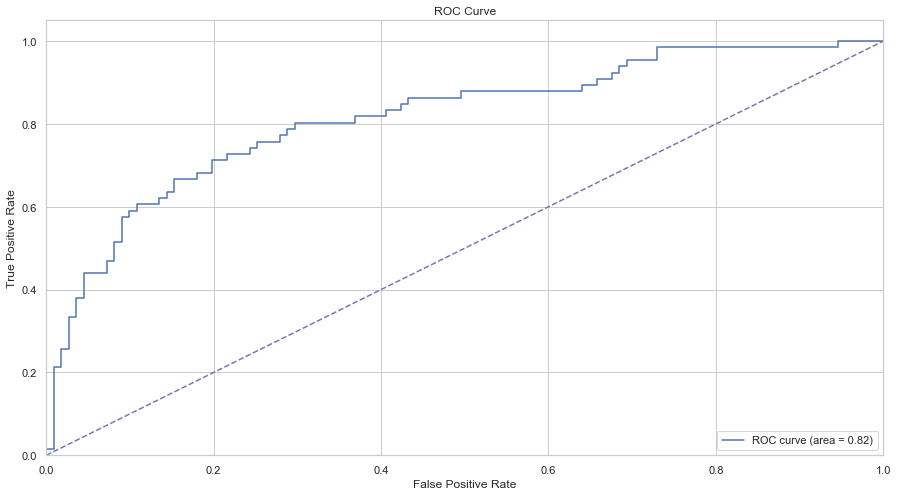

In [98]:
# ROC/AUC
svm.fit(X_train, y_train)

# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, svm._predict_proba_lr(X_test)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('***ROC AUC Score: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'm--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### **kNN**

In [99]:
# Predictions
predictions_knn = knn.predict(X_test)
print("Predictions:", len(predictions_knn))

# First 10 values of validation predictions
(print("First 10 values of Validation Predictions:" , predictions_knn[:10]))

# Accuracy score 
from sklearn.metrics import accuracy_score
print("Accuracy Score:" , accuracy_score(y_test, predictions_knn))
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

# Classification report, Confusion Matrix.
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:" , confusion_matrix(y_test, predictions_knn))

# Precision
from sklearn.metrics import precision_score
print("Precision Score:" , precision_score(y_test, predictions_knn))

# Recall Score
from sklearn.metrics import recall_score
print("Recall Score:" , recall_score(y_test, predictions_knn))

Predictions: 177
First 10 values of Validation Predictions: [1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
Accuracy Score: 0.7570621468926554
Confusion Matrix: [[96 15]
 [28 38]]
Precision Score: 0.7169811320754716
Recall Score: 0.5757575757575758


In [100]:
# Cross Validation
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.74647887 0.78873239 0.88732394 0.88732394 0.87323944 0.76056338
 0.78571429 0.82857143 0.85714286 0.85507246]
Mean: 0.8270163007027673
Standard Deviation: 0.05018123133758204


In [101]:
# Classification Report
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

         0.0       0.77      0.86      0.82       111
         1.0       0.72      0.58      0.64        66

   micro avg       0.76      0.76      0.76       177
   macro avg       0.75      0.72      0.73       177
weighted avg       0.75      0.76      0.75       177



***ROC AUC Score: 0.78


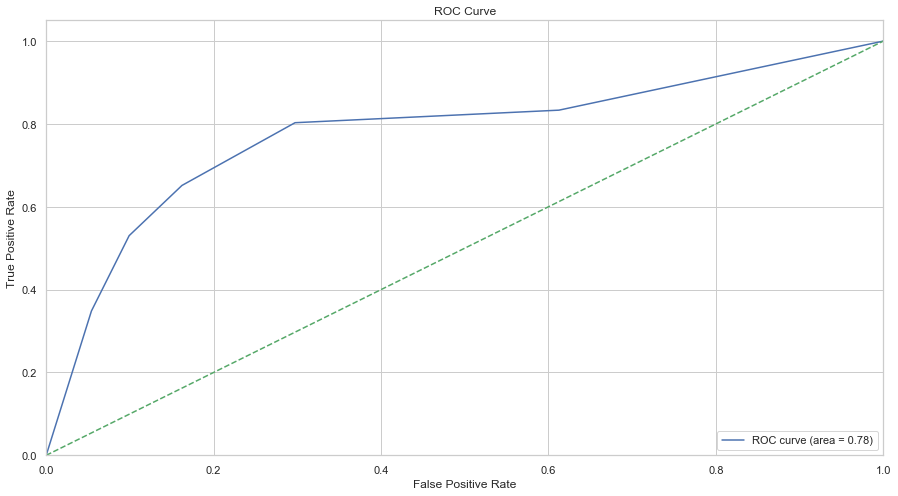

In [102]:
# ROC/AUC
knn.fit(X_train, y_train)

# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('***ROC AUC Score: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### **Stochastic Gradient Descent**

In [103]:
# Predictions
predictions_sgd = sgd.predict(X_test)
print("Predictions:", len(predictions_sgd))

# First 10 values of validation predictions
(print("First 10 values of Validation Predictions:" , predictions_sgd[:10]))

# Accuracy score 
from sklearn.metrics import accuracy_score
print("Accuracy Score:" , accuracy_score(y_test, predictions_sgd))
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

# Classification report, Confusion Matrix.
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:" , confusion_matrix(y_test, predictions_sgd))

# Precision
from sklearn.metrics import precision_score
print("Precision Score:" , precision_score(y_test, predictions_sgd))

# Recall Score
from sklearn.metrics import recall_score
print("Recall Score:" , recall_score(y_test, predictions_sgd))


Predictions: 177
First 10 values of Validation Predictions: [1. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
Accuracy Score: 0.7175141242937854
Confusion Matrix: [[82 29]
 [21 45]]
Precision Score: 0.6081081081081081
Recall Score: 0.6818181818181818


In [104]:
# Cross Validation
sgd = linear_model.SGDClassifier()
scores = cross_val_score(sgd, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.67605634 0.61971831 0.8028169  0.71830986 0.64788732 0.76056338
 0.8        0.78571429 0.68571429 0.76811594]
Mean: 0.7264896626133613
Standard Deviation: 0.0628350607764965


In [105]:
# Classification Report
print(classification_report(y_test, predictions_sgd))

              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77       111
         1.0       0.61      0.68      0.64        66

   micro avg       0.72      0.72      0.72       177
   macro avg       0.70      0.71      0.70       177
weighted avg       0.73      0.72      0.72       177



**A realization upon plotting the ROC/AUC for Stochastic Gradient Descent:**
    - SGDClassifier(loss = 'hinge') does not have probability by default. 
    - You must pass SGDclassifier(loss = 'hinge') to CalibratedClassifierCV() which will calculate the probability values of SGDclassifier(loss = 'hinge').
    
   - Probability calibration: "Well calibrated classifiers are probabilistic classifiers for which the 
     output of the predict_proba method can be directly interpreted as a confidence level."

***ROC AUC Score: 0.81


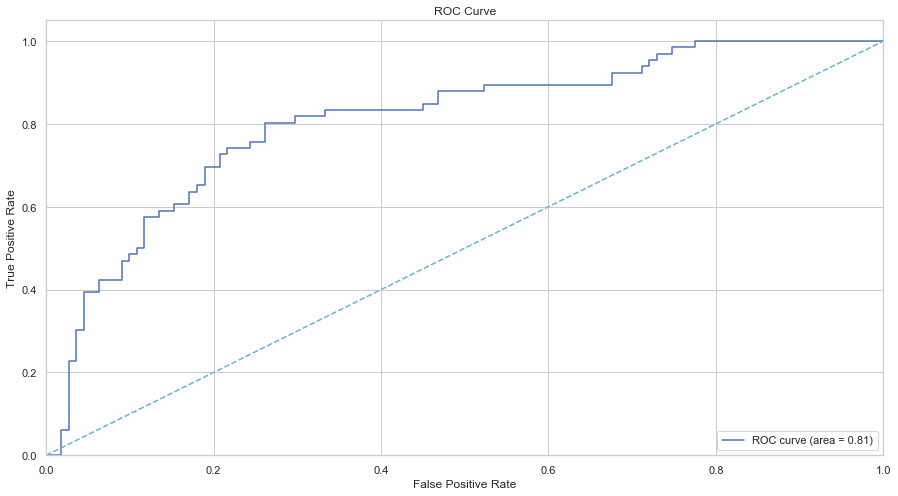

In [106]:
# ROC/AUC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier

# SGDclassifier(loss = 'hinge') -> CalibratedClassifierCV()
sgd = SGDClassifier(loss='hinge')
calibrated_sgd = CalibratedClassifierCV(sgd, cv=5, method='sigmoid')
calibrated_sgd.fit(X_train, y_train)

sgd2 = calibrated_sgd 

# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, sgd2.predict_proba(X_test)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('***ROC AUC Score: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'c--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Decision Tree

In [107]:
# Predictions
predictions_dt = dt.predict(X_test)
print("Predictions:", len(predictions_dt))

# First 10 values of validation predictions
(print("First 10 values of Validation Predictions:" , predictions_dt[:10]))

# Accuracy score 
from sklearn.metrics import accuracy_score
print("Accuracy Score:" , accuracy_score(y_test, predictions_dt))
acc_dt = round(dt.score(X_train, y_train) * 100, 2)

# Classification report, Confusion Matrix.
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:" , confusion_matrix(y_test, predictions_dt))

# Precision
from sklearn.metrics import precision_score
print("Precision Score:" , precision_score(y_test, predictions_dt))

# Recall Score
from sklearn.metrics import recall_score
print("Recall Score:" , recall_score(y_test, predictions_dt))

Predictions: 177
First 10 values of Validation Predictions: [1. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
Accuracy Score: 0.7401129943502824
Confusion Matrix: [[85 26]
 [20 46]]
Precision Score: 0.6388888888888888
Recall Score: 0.696969696969697


In [108]:
#  Cross Validation
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.73239437 0.83098592 0.84507042 0.83098592 0.83098592 0.74647887
 0.85714286 0.81428571 0.77142857 0.79710145]
Mean: 0.805686000058321
Standard Deviation: 0.04039500775009063


In [109]:
# Classification Report
print(classification_report(y_test, predictions_dt))

              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79       111
         1.0       0.64      0.70      0.67        66

   micro avg       0.74      0.74      0.74       177
   macro avg       0.72      0.73      0.73       177
weighted avg       0.75      0.74      0.74       177



***ROC AUC Score: 0.74


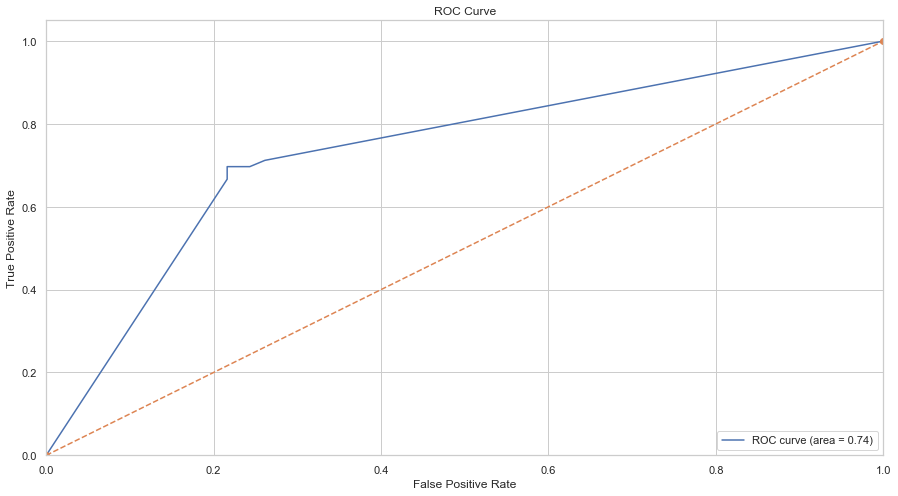

In [110]:
# ROC/AUC
dt.fit(X_train, y_train)

# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, dt.predict_proba(X_test)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('***ROC AUC Score: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'o--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Model Interpretation

## Which is the best model?

In [111]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'KNN', 
              'Stochastic Gradient Descent', 'Decision Tree'],
    'Score': [acc_log, acc_svm, acc_knn, acc_sgd, acc_dt]})
models.sort_values(by='Score',ascending=False)

results = models.sort_values(by='Score', ascending=False)
results = results.set_index('Score')
results.head()

,Model
Score,
90.35,Decision Tree
86.38,KNN
80.85,Support Vector Machines
80.43,Logistic Regression
79.15,Stochastic Gradient Descent


- In conclusion, we can see **Decision Tree** is the model with the best performance. Based on its high accuracy score, it is the closest to 100%. 
- **K-Nearest Neighbors (kNN)** can be a second option.

### In summary:

**Few key variables that are important in predicting the survival of the passengers.** 
- Age and Gender were two key variables in predicting the survival of passengers.

*Characteristics that improved passengers’ chance of survival:*
 
- Females and children were given priority, and had the highest chance of survival than men.
- Smaller families had better chances of survival vs bigger families. This could have been because it was easier for smaller families to have a higher chance to be seated in lifeboats whereas it was most likely harder for bigger families to stick together amidst the chaos.
- Passengers with the title "Master" or "Dr" which indicated upper class had a higher chance of survival than those with title "Mr". 
- Passengers within the age group of 0-18, also had a higher chance of survival but this also depended on which class you belonged to.
- First class and middle class had more priority of being rescued than lower class.